### 1. Importar librerías y carga de datos

In [ ]:
# Manejo de datos
import pandas as pd


# Graficación
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Estilo de seaborn
sns.set(style="whitegrid")

plt.rcParams['figure.figsize'] = (10, 6)

# Formato linear, no cientifico
plt.rcParams['axes.formatter.useoffset'] = False

### 2. Carga de datos

In [5]:
sales_df = pd.read_csv('Sales Dataset.csv')

### 3. Exploracion inicial de datos

In [6]:
# Imprimir las 5 primeras filas del DataFrame
sales_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [7]:
# Resumen del dataframe
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


In [8]:
# Estadisticas basicas
sales_df.describe()

,Amount,Profit,Quantity
count,1194.000000,1194.000000,1194.000000
mean,5178.089615,1348.992462,10.674204
std,2804.921955,1117.992573,5.777102
min,508.000000,50.000000,1.000000
25%,2799.000000,410.000000,6.000000
50%,5152.000000,1014.000000,11.000000
75%,7626.000000,2035.000000,16.000000
max,9992.000000,4930.000000,20.000000


In [9]:
# Verificamos si hay valores nulos
sales_df.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64

In [10]:
# Casteo de columnas
# Convertimos las columnas categoricas a tipo 'category'
columnas = ['Category', 'Sub-Category', 'City', 'PaymentMode', 'State', ]

for cof in columnas:
    sales_df[cof] = sales_df[cof].astype('category')
    
# Convertimos la columna 'Order Date' y 'Year-Month' a tipo 'datetime'
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df['Year-Month'] = pd.to_datetime(sales_df['Year-Month'], format='%Y-%m')

# Creamos la columa "Year" y "Month" a partir de la columna "Order Date" (Para poder graficar)
sales_df['Year'] = sales_df['Order Date'].dt.year
sales_df['Month'] = sales_df['Order Date'].dt.month

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1194 non-null   object        
 1   Amount        1194 non-null   int64         
 2   Profit        1194 non-null   int64         
 3   Quantity      1194 non-null   int64         
 4   Category      1194 non-null   category      
 5   Sub-Category  1194 non-null   category      
 6   PaymentMode   1194 non-null   category      
 7   Order Date    1194 non-null   datetime64[ns]
 8   CustomerName  1194 non-null   object        
 9   State         1194 non-null   category      
 10  City          1194 non-null   category      
 11  Year-Month    1194 non-null   datetime64[ns]
 12  Year          1194 non-null   int32         
 13  Month         1194 non-null   int32         
dtypes: category(5), datetime64[ns](2), int32(2), int64(3), object(2)
memory usage: 82.2+ KB


### 4. Analisis de datos
4.1. Analisis de ventas

In [11]:
# Ventas totales
print('Ventas totales: ', sales_df['Amount'].sum())

# Beneficio total
print("Ganancias totales: ", sales_df['Profit'].sum())

# Venta promedio por orden
print("Venta promedio por orden: ", sales_df['Amount'].mean())

Ventas totales:  6182639
Ganancias totales:  1610697
Venta promedio por orden:  5178.089614740368


4.2. Analisis de ventas por categoría

Categoria que mas vende:  Category
Office Supplies    2089510
Electronics        2054456
Furniture          2038673
Name: Amount, dtype: int64


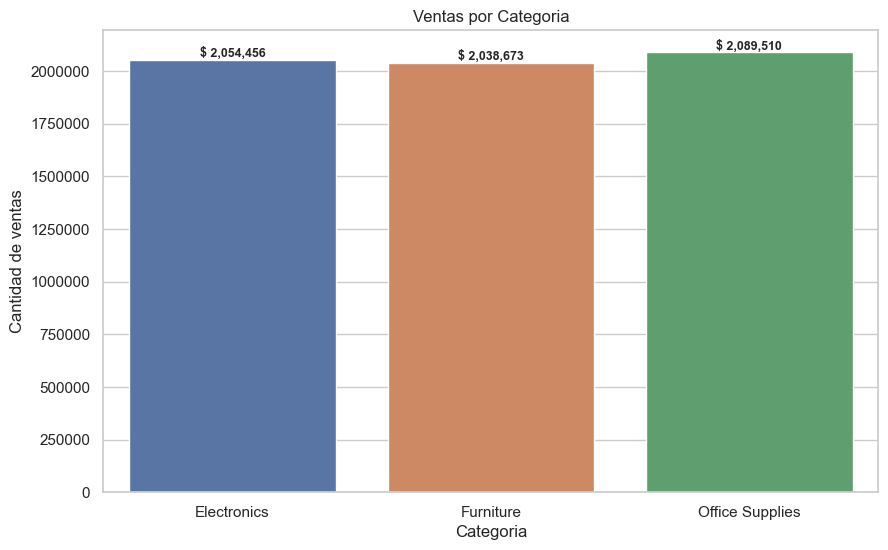

In [32]:
# categoria que mas vende
print("Categoria que mas vende: ", sales_df.groupby('Category', observed=False)['Amount'].sum().sort_values(ascending=False))

# Grafico de ventas por categoria
plt.ticklabel_format(style='plain', axis='y')
ax = sns.barplot(x='Category', y='Amount', data=sales_df, estimator=sum, hue='Category', errorbar=None)

# Titulos y etiquetas
plt.title('Ventas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Cantidad de ventas')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'$ {height:,.0f}',             # formato sin decimales y con separador de miles
                (p.get_x() + p.get_width() / 2, height),  # posición (x, y)
                ha='center', va='bottom',     # alineación horizontal y vertical
                fontsize=9, fontweight='bold')

# Mostrar el grafico
plt.show()

Sub categoria que mas vende:  Sub-Category
Markers             627875
Tables              625177
Sofas               568367
Printers            566359
Electronic Games    565092
Pens                552269
Paper               524755
Phones              503055
Chairs              431964
Laptops             419950
Bookcases           413165
Binders             384611
Name: Amount, dtype: int64


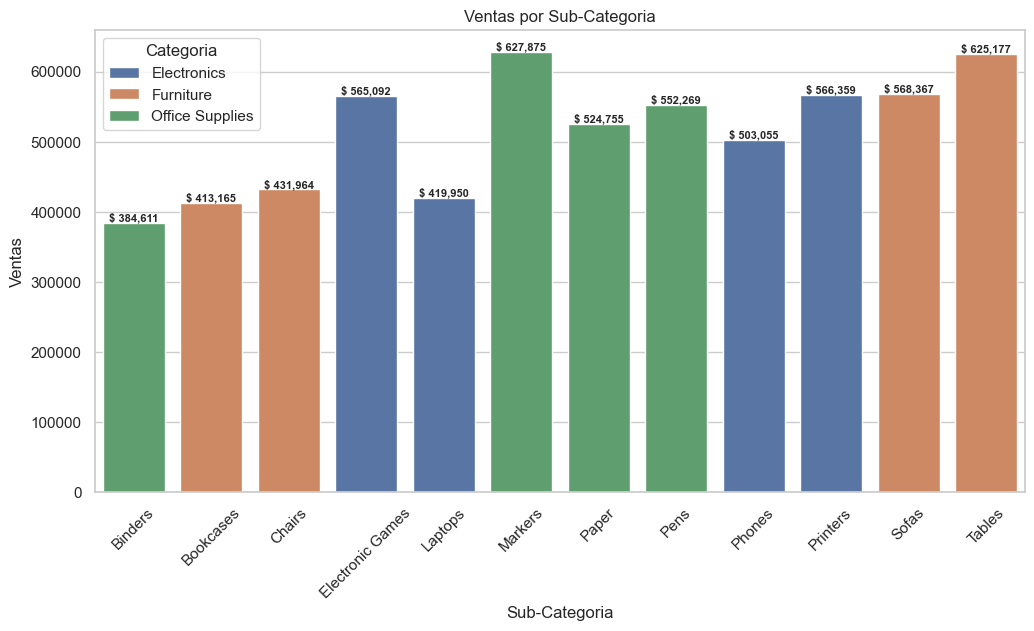

In [31]:
# Sub categorias que mas venden
print("Sub categoria que mas vende: ", sales_df.groupby('Sub-Category', observed=False)['Amount'].sum().sort_values(ascending=False))

# Grafico de ventas por sub categoria
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Sub-Category', y='Amount', data=sales_df, estimator=sum, hue='Category', errorbar=None)

# Titulos y etiquetas
plt.title('Ventas por Sub-Categoria')
plt.xlabel('Sub-Categoria')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.legend(title='Categoria')

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Evita anotar barras invisibles si las hay
        ax.annotate(f'$ {height:,.0f}', 
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=8, fontweight='bold')

# Mostrar el grafico
plt.show()

Metodo de pago que mas se usa:  PaymentMode
Debit Card     1395035
Credit Card    1281044
UPI            1250473
COD            1141790
EMI            1114297
Name: Amount, dtype: int64


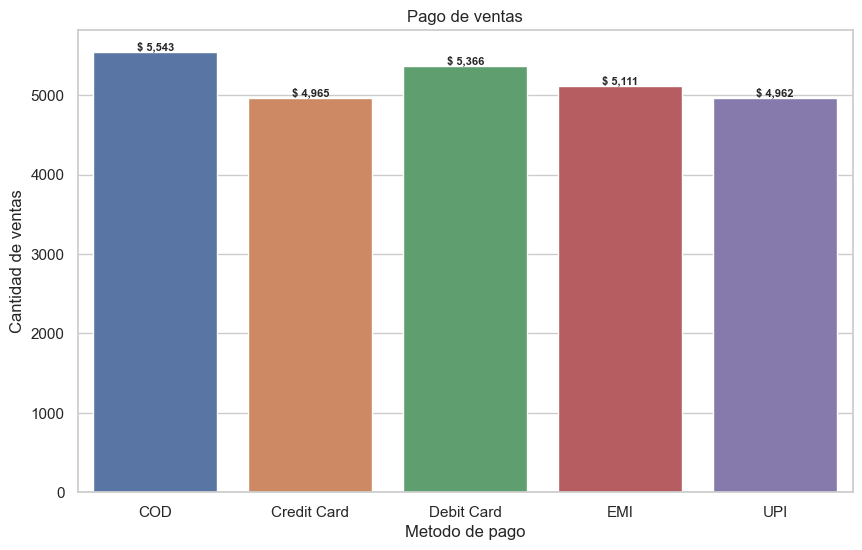

In [30]:
# Metodo de pago que mas ganancias genera
print("Metodo de pago que mas se usa: ", sales_df.groupby('PaymentMode', observed=False)['Amount'].sum().sort_values(ascending=False))

# Grafico de metodo de pago
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='PaymentMode', y="Amount", data=sales_df, hue='PaymentMode', errorbar=None)

# Titulos y etiquetas
plt.title('Pago de ventas')
plt.xlabel('Metodo de pago')
plt.ylabel('Cantidad de ventas')

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Evita anotar barras invisibles si las hay
        ax.annotate(f'$ {height:,.0f}', 
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=8, fontweight='bold')


# Mostrar el grafico
plt.show()

4.3. Analisis de ventas temporal

Ventas por año:  Year
2022    1459775
2023    1229723
2024    1202478
2021    1181446
2020     859401
2025     249816
Name: Amount, dtype: int64


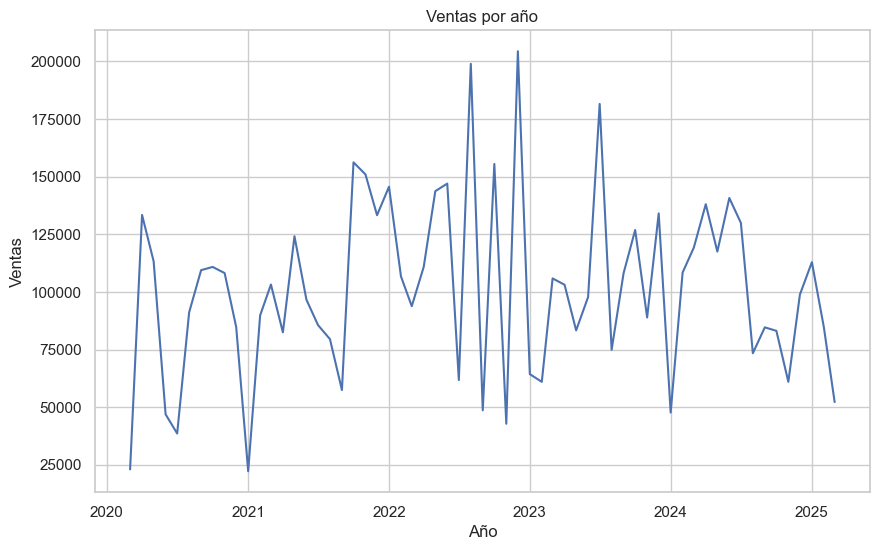

In [15]:
# Ventas por año
print("Ventas por año: ", sales_df.groupby('Year', observed=False)['Amount'].sum().sort_values(ascending=False))

# Grafico de tendencia
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(x='Year-Month', y='Amount', data=sales_df, estimator=sum, errorbar=None)

# Titulos y etiquetas
plt.title('Ventas por año')
plt.xlabel('Año')
plt.ylabel('Ventas')

# Mostrar el grafico
plt.show()

4.4. Análisis de ventas por geografia

Ventas por estado:  State
New York      1130048
Florida       1091174
California    1086436
Texas         1011475
Illinois       978738
Ohio           884768
Name: Amount, dtype: int64


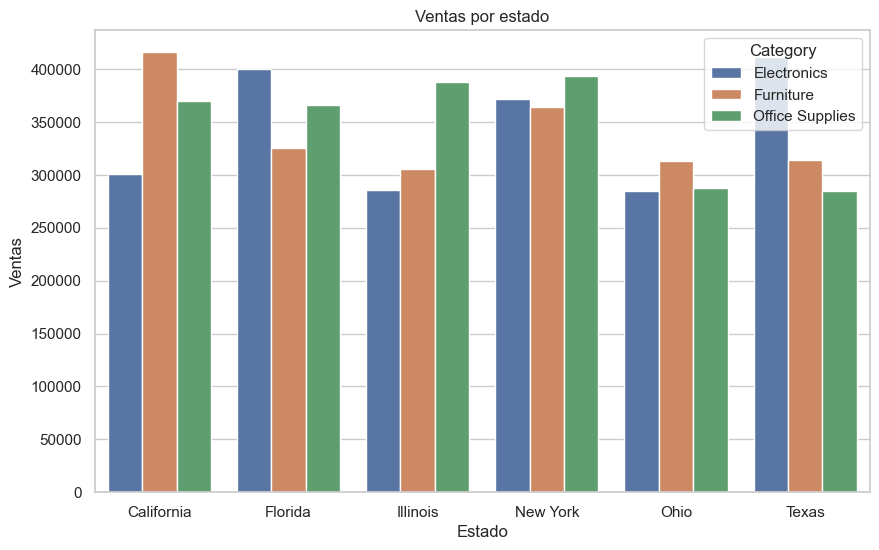

In [16]:
# Ventas por estado
print("Ventas por estado: ", sales_df.groupby('State', observed=False)['Amount'].sum().sort_values(ascending=False))

# Grafico de ventas por estado
sns.barplot(x='State', y='Amount', data=sales_df, estimator=sum, hue='Category', errorbar=None)

# Titulos y etiquetas
plt.title('Ventas por estado')
plt.xlabel('Estado')
plt.ylabel('Ventas')

# Mostrar el grafico
plt.show()


In [17]:
# Mapa de calor de ventas por estado

# Abreviaciones de los estados de EE.UU.
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Agrgamos la columna de abreviaciones de los estados al DataFrame
sales_df['State_abbrev'] = sales_df['State'].map(us_state_abbrev)

# Agrupar por abreviaciones
ventas_estado = sales_df.groupby("State_abbrev", observed=False)["Amount"].sum().reset_index() 

# Crear el mapa de calor
fig = px.choropleth(
    ventas_estado,
    locations="State_abbrev",
    locationmode="USA-states",  # Esto usa las abreviaciones oficiales (CA, TX, etc.)
    color="Amount",
    color_continuous_scale="Blues",
    scope="usa",
    labels={'Amount': 'Ventas'},
    title="Mapa de Calor de Ventas por Estado (EE.UU.)"
)

fig.show()

Top 5 clientes que mas compran:             CustomerName  Amount
163          Cory Evans   28557
234       Emily Ellison   27352
256       George Foster   27352
584   Nicholas Anderson   27352
400  Katherine Williams   25121


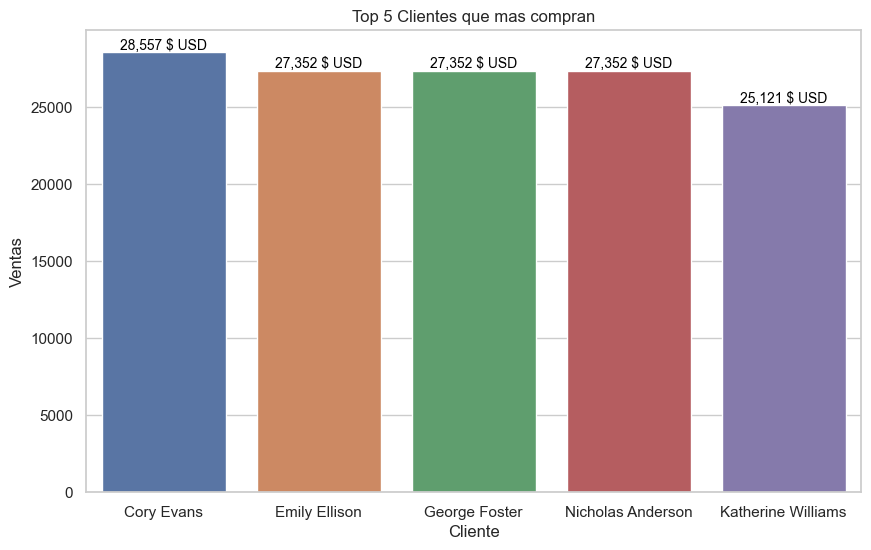

In [ ]:
# Top 5 clientes que mas compran
# Agrupamos por cliente y sumamos las ventas
top_clientes = sales_df.groupby("CustomerName", observed=False)["Amount"].sum().reset_index().sort_values(by="Amount", ascending=False).head(5)

print("Top 5 clientes que mas compran: ", top_clientes)

# Creamos una gráfica de barras con el top 5 clientes
ax = sns.barplot(x='CustomerName', y='Amount', data=top_clientes, estimator=sum, errorbar=None, hue='CustomerName')

# Titulos y etiquetas
plt.title("Top 5 Clientes que mas compran")
plt.xlabel("Cliente")
plt.ylabel("Ventas")

for p in ax.patches:
    ax.annotate(f'$ {p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')  

# Graficamos
plt.show()
